In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod

In [2]:
class Tree:
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#008080"
    GOLD = "#ffd700"
    PURPLE = "#800080"

    colors = [TEAL, GOLD, PURPLE]

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = []
        self.row = 0
        self.label = label

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)

class DataFrameGenerator:
    @staticmethod
    def generateGraphData(node : Node, horizontal_flip = False, predecessor_successor_array = []) -> list:
        successors = node.successors[::-1] if horizontal_flip else node.successors
        for successor in successors:
            predecessor_successor_array.append([node.label, successor.label])
            DataFrameGenerator.generateGraphData(successor, horizontal_flip, predecessor_successor_array)
        return predecessor_successor_array

    @staticmethod
    def generateDataFrame(node : Node, horizontal_flip = False) -> pd.DataFrame: 
        columns = ['predecessorId', 'successorId']
        df = pd.DataFrame(columns = columns, data=DataFrameGenerator.generateGraphData(node, horizontal_flip, []))
        df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
        df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
        return df

In [3]:
def func_V(n):
    return 4 * n + 1

def func_S(n):
    return 2 * n + 1

def func_G(n):
    return 2 * n - 1

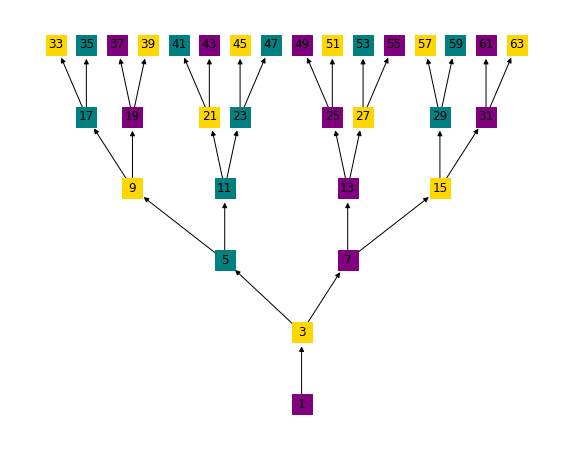

In [4]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height
        super().__init__(root)
        

    def generate(self, node: Node):
        

        if node.row == 0:
            middle_child = Node(node.label * 2 + 1)
            node.addSuccessor(middle_child)
            self.generate(middle_child)

        elif node.row < self.height:
           
            #middle_child = Node(node.label * 4 + 1)
            right_child = Node(node.label * 2 + 1)
            left_child = Node(node.label * 2 - 1)

            node.addSuccessor(right_child)
            #node.addSuccessor(middle_child)
            node.addSuccessor(left_child)

            self.generate(right_child)
            #self.generate(middle_child)
            self.generate(left_child)


root = Node(1)
aberkane_tree = AberkaneTree(root, 5)

df = DataFrameGenerator.generateDataFrame(aberkane_tree.root, True)
G = nx.from_pandas_edgelist(df, 'predecessorId', 'successorId', create_using=nx.DiGraph)
node_colors = []
for node in G:
    color_type = Node.getType(node)
    node_colors.append(Node.colors[color_type-1])
pos = graphviz_layout(G, prog="dot", root=1, args='-Gsplines=true -Gsep=1 -Goverlap=false -Gorientation=10')
plt.figure(figsize=(10, 8))
plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, node_color=node_colors, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=1) # "node_color is not defined..."